In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

In [2]:
energy_data, temperature_data, stations_data = pd.read_pickle("../Data/CleanedData.pickle")
data = pd.read_pickle("../Data/Data.pickle")

# Missing Data
As part of the preliminary analysis of our data, we need to check the condition of our data regarding missing data. Particularly the energy demand and air temperature because this is the primary data that is being assess and analysed, so it is critical that we know exactly where inconsistences, errors and missing data occurs.
We able to do this by graphing the energy demand and air temperature for each state. This is done below with exaplnations of what each graph shows.


## Tasmania Demand And Air Temp
This shows that there is no data for both the total demand and air temperature before 2005 for Tasmania. After 2005, all total demand data howeverther is gaps in air temperature data between 2012-2015 and after 2016.

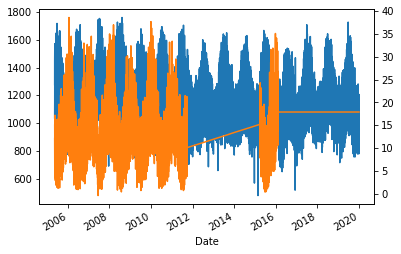

In [44]:
data.groupby("Region", sort=False).get_group("TAS")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("TAS")["AirTemperature"]["2000":"2020"].plot(secondary_y=True)

## Victoria Demand And Air Temp
This shows that there is no gaps in total demand data however there is no air temperature data after 2012.

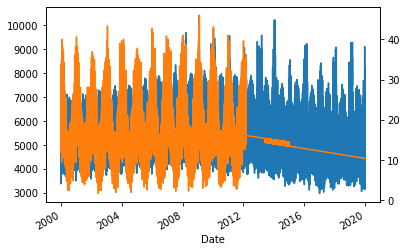

In [45]:
data.groupby("Region", sort=False).get_group("VIC")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("VIC")["AirTemperature"]["2000":"2020"].plot(secondary_y=True)

## New South Wales Demand And Air Temp
This shows that there is no gaps in total demand data however there is no air temperature data before 2002, between 2003-2010, 2013-2016 and after 2017.

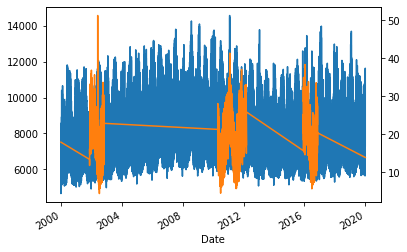

In [46]:
data.groupby("Region", sort=False).get_group("NSW")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("NSW")["AirTemperature"]["2000":"2020"].plot(secondary_y=True)

## Queensland Demand And Air Temp
This shows that there is no gaps in total demand data however there is no air temperature data before 2001, between 2003-2006, 2007-2008, 2010 and 2016.

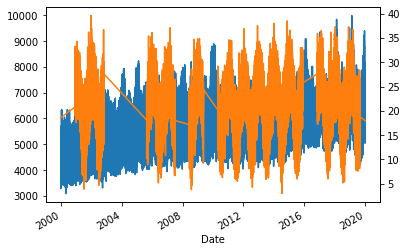

In [47]:
data.groupby("Region", sort=False).get_group("QLD")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("QLD")["AirTemperature"]["2000":"2020"].plot(secondary_y=True)

## South Australia Demand And Air Temp
This shows that there is no gaps in total demand data however there is no air temperature data between 2013-2015, 2017-2018 and after 2019.

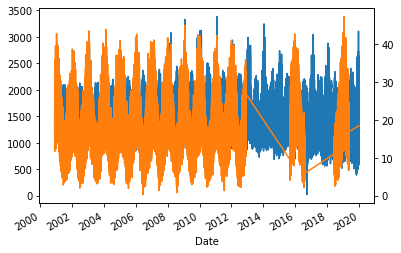

In [48]:
data.groupby("Region", sort=False).get_group("SA")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("SA")["AirTemperature"]["2000":"2020"].plot(secondary_y=True)

From the graphs above, we see that there is a significant amount of missing data in regards to air temperature. This would have devistating effects on any data analysis, making it unrelyable due to the breaks. Miraculously, one of our team members decided to check the wet bulb temeprature which was an alternate temperature measure. It happened that this data had none missing which was checked with the following graphs.

## Tasmania Demand And Wet Bulb Temp

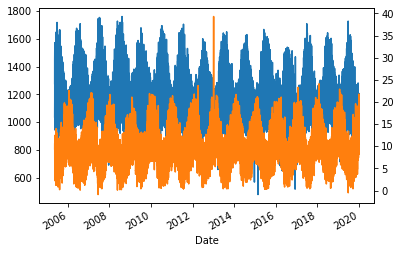

In [14]:
data.groupby("Region", sort=False).get_group("TAS")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("TAS")["WetBulbTemperature"]["2000":"2020"].plot(secondary_y=True)

## Victoria Demand And Wet Bulb Temp

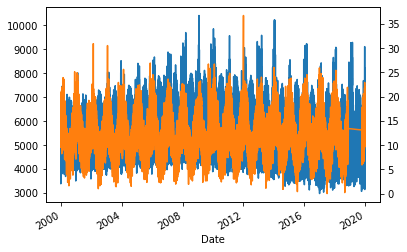

In [15]:
data.groupby("Region", sort=False).get_group("VIC")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("VIC")["WetBulbTemperature"]["2000":"2020"].plot(secondary_y=True)

## New South Wales Demand And Wet Bulb Temp

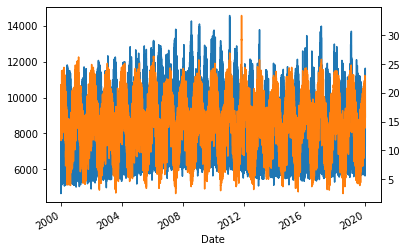

In [16]:
data.groupby("Region", sort=False).get_group("NSW")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("NSW")["WetBulbTemperature"]["2000":"2020"].plot(secondary_y=True)

## Queensland Demand And Wet Bulb Temp

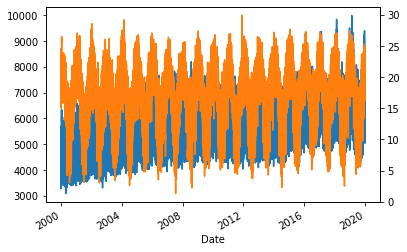

In [17]:
data.groupby("Region", sort=False).get_group("QLD")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("QLD")["WetBulbTemperature"]["2000":"2020"].plot(secondary_y=True)

## South Australia Demand And Wet Bulb Temp

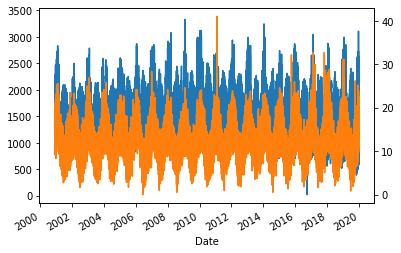

In [18]:
data.groupby("Region", sort=False).get_group("SA")["TotalDemand"]["2000":"2020"].plot()
data.groupby("Region", sort=False).get_group("SA")["WetBulbTemperature"]["2000":"2020"].plot(secondary_y=True)

_______________________________________________________________________________________________________________________________
# 20 Year Period
To begin analyse we were looking at the trends and relationships over the full 20 year period. First by looking at the energy demand.
## Energy Demand
### Original Data Of Each State
Graphing the original data gives us the following. However due to the immence amount of data, the graph is too crowded to distinguish any trends so the data needs to be downsized. A way do this is to resample the data. The next following graphs are different possible ways and variations of resampling the data.

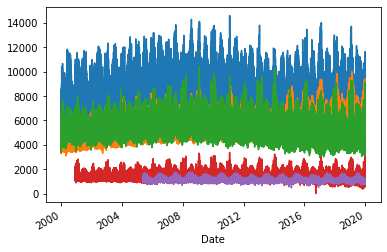

In [19]:
data.groupby("Region", sort=False).get_group("NSW")["TotalDemand"]["2000":"2019"].plot(label= "NSW")
data.groupby("Region", sort=False).get_group("QLD")["TotalDemand"]["2000":"2019"].plot(label= "QLD")
data.groupby("Region", sort=False).get_group("VIC")["TotalDemand"]["2000":"2019"].plot(label= "VIC")
data.groupby("Region", sort=False).get_group("SA")["TotalDemand"]["2000":"2019"].plot(label= "SA")
data.groupby("Region", sort=False).get_group("TAS")["TotalDemand"]["2000":"2019"].plot(label= "TAS")

This data is resampled by taking all the data from each day and taking the maximum. By taking the maximums, we account for any extremes in demand for each day which could be based on extremely high/low temperatures.

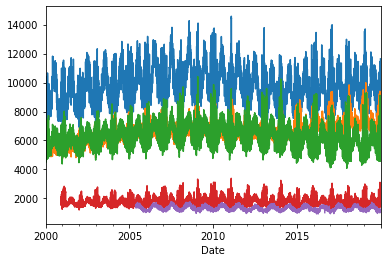

In [20]:
data.groupby("Region").resample("D").max()["TotalDemand"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("D").max()["TotalDemand"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("D").max()["TotalDemand"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("D").max()["TotalDemand"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("D").max()["TotalDemand"]["TAS"]["2000":"2019"].plot()

This data is resampled by taking all the data from each day and taking the average. By taking the averages, we account for fluctuations during a day.

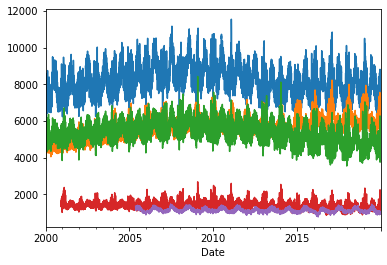

In [21]:
data.groupby("Region").resample("D").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["TAS"]["2000":"2019"].plot()

This data is resampled by taking all the data from each week and taking the maximum. By taking the maximums, we account for any extremes in demand for each week which could be based on extremely high/low temperatures.

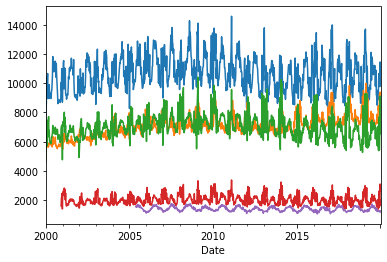

In [22]:
data.groupby("Region").resample("W").max()["TotalDemand"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("W").max()["TotalDemand"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("W").max()["TotalDemand"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("W").max()["TotalDemand"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("W").max()["TotalDemand"]["TAS"]["2000":"2019"].plot()

This data is resampled by taking all the data from each week and taking the average. By taking the averages, we account for fluctuations during a week in regards to different demands per day, like a weekend versus a weekday.

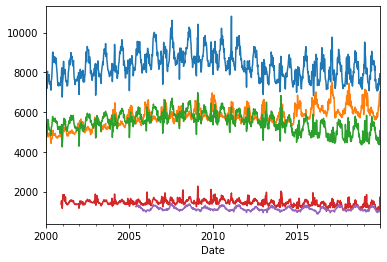

In [23]:
data.groupby("Region").resample("W").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("W").mean()["TotalDemand"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("W").mean()["TotalDemand"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("W").mean()["TotalDemand"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("W").mean()["TotalDemand"]["TAS"]["2000":"2019"].plot()

This data is resampled by taking all the data from each month and taking the maximum. By taking the maximums, we account for any extremes in demand for each month which could be based on extremely high/low temperatures.

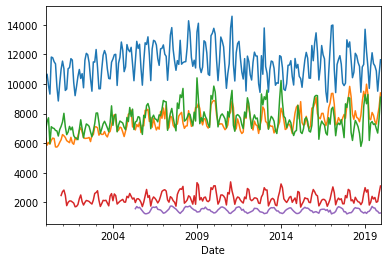

In [24]:
data.groupby("Region").resample("M").max()["TotalDemand"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["TotalDemand"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["TotalDemand"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["TotalDemand"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["TotalDemand"]["TAS"]["2000":"2019"].plot()

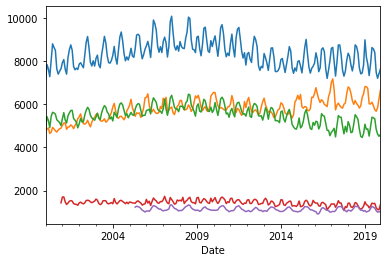

In [25]:
data.groupby("Region").resample("M").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("M").mean()["TotalDemand"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("M").mean()["TotalDemand"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("M").mean()["TotalDemand"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("M").mean()["TotalDemand"]["TAS"]["2000":"2019"].plot()

As the data is resampled, the trends within the demand data become more clear. From the month to month, demand appears to maximise twice a year across all the states. These extreme fluctuations are shown when taking the maximums.

## Temperature
### Original Data Of Each State

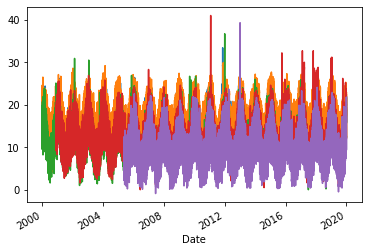

In [26]:
data.groupby("Region", sort=False).get_group("NSW")["WetBulbTemperature"]["2000":"2019"].plot(label= "NSW")
data.groupby("Region", sort=False).get_group("QLD")["WetBulbTemperature"]["2000":"2019"].plot(label= "QLD")
data.groupby("Region", sort=False).get_group("VIC")["WetBulbTemperature"]["2000":"2019"].plot(label= "VIC")
data.groupby("Region", sort=False).get_group("SA")["WetBulbTemperature"]["2000":"2019"].plot(label= "SA")
data.groupby("Region", sort=False).get_group("TAS")["WetBulbTemperature"]["2000":"2019"].plot(label= "TAS")

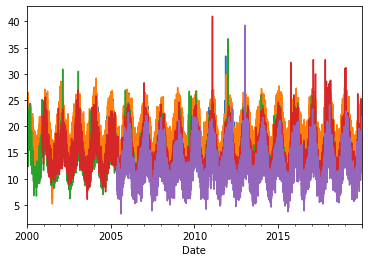

In [27]:
data.groupby("Region").resample("D").max()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("D").max()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("D").max()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("D").max()["WetBulbTemperature"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("D").max()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot()

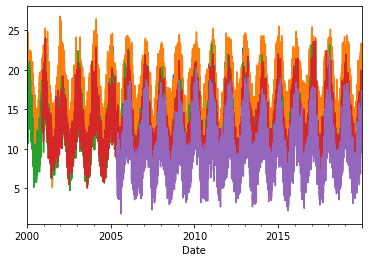

In [28]:
data.groupby("Region").resample("D").mean()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("D").mean()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("D").mean()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("D").mean()["WetBulbTemperature"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("D").mean()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot()

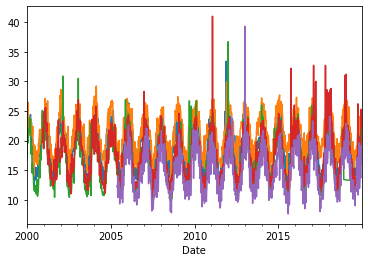

In [29]:
data.groupby("Region").resample("W").max()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("W").max()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("W").max()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("W").max()["WetBulbTemperature"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("W").max()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot()

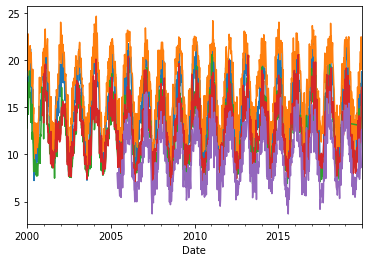

In [30]:
data.groupby("Region").resample("W").mean()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("W").mean()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("W").mean()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("W").mean()["WetBulbTemperature"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("W").mean()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot()

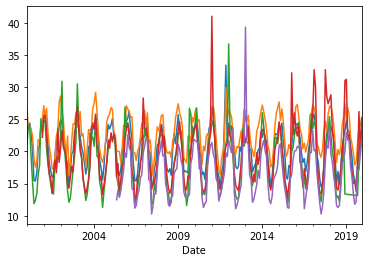

In [31]:
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot()

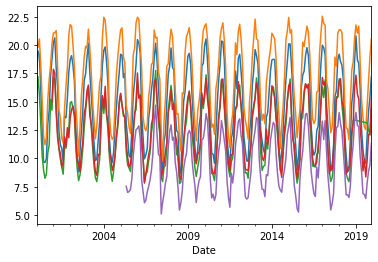

In [32]:
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot()

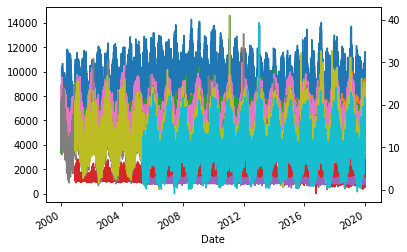

In [33]:
data.groupby("Region", sort=False).get_group("NSW")["TotalDemand"]["2000":"2019"].plot(label= "NSW")
data.groupby("Region", sort=False).get_group("QLD")["TotalDemand"]["2000":"2019"].plot(label= "QLD")
data.groupby("Region", sort=False).get_group("VIC")["TotalDemand"]["2000":"2019"].plot(label= "VIC")
data.groupby("Region", sort=False).get_group("SA")["TotalDemand"]["2000":"2019"].plot(label= "SA")
data.groupby("Region", sort=False).get_group("TAS")["TotalDemand"]["2000":"2019"].plot(label= "TAS")
data.groupby("Region", sort=False).get_group("NSW")["WetBulbTemperature"]["2000":"2019"].plot(label= "NSW", secondary_y=True)
data.groupby("Region", sort=False).get_group("QLD")["WetBulbTemperature"]["2000":"2019"].plot(label= "QLD", secondary_y=True)
data.groupby("Region", sort=False).get_group("VIC")["WetBulbTemperature"]["2000":"2019"].plot(label= "VIC", secondary_y=True)
data.groupby("Region", sort=False).get_group("SA")["WetBulbTemperature"]["2000":"2019"].plot(label= "SA", secondary_y=True)
data.groupby("Region", sort=False).get_group("TAS")["WetBulbTemperature"]["2000":"2019"].plot(label= "TAS", secondary_y=True)

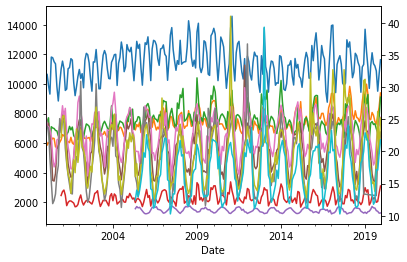

In [34]:
data.groupby("Region").resample("M").max()["TotalDemand"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["TotalDemand"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["TotalDemand"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["TotalDemand"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["TotalDemand"]["TAS"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot(secondary_y=True)
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot(secondary_y=True)
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot(secondary_y=True)
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["SA"]["2000":"2019"].plot(secondary_y=True)
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot(secondary_y=True)

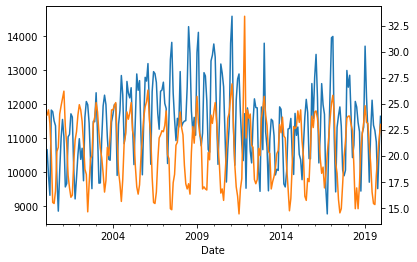

In [35]:
data.groupby("Region").resample("M").max()["TotalDemand"]["NSW"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot(secondary_y=True)

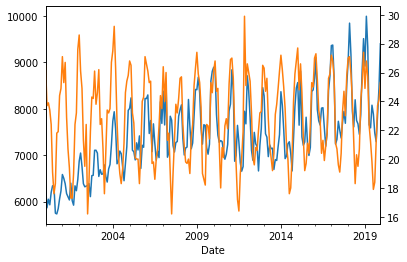

In [36]:
data.groupby("Region").resample("M").max()["TotalDemand"]["QLD"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot(secondary_y=True)

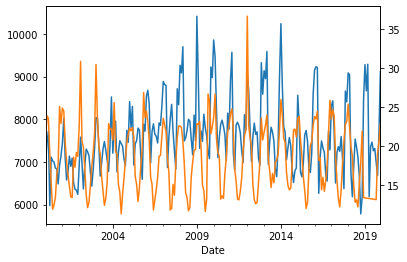

In [37]:
data.groupby("Region").resample("M").max()["TotalDemand"]["VIC"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot(secondary_y=True)

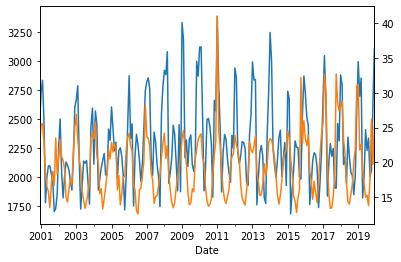

In [38]:
data.groupby("Region").resample("M").max()["TotalDemand"]["SA"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["SA"]["2000":"2019"].plot(secondary_y=True)

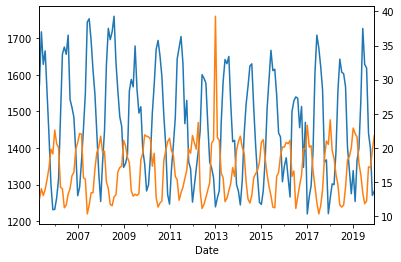

In [39]:
data.groupby("Region").resample("M").max()["TotalDemand"]["TAS"]["2000":"2019"].plot()
data.groupby("Region").resample("M").max()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot(secondary_y=True)